<a href="https://colab.research.google.com/github/manjis2k3/coursera_capstone/blob/master/ConvWithImageGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-04-16 07:45:25--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   110MB/s    in 1.3s    

2020-04-16 07:45:27 (110 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile
localzip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(localzip,'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
train_horse_dir=os.path.join('/tmp/horse-or-human/horses')
train_human_dir= os.path.join('/tmp/horse-or-human/humans')

In [8]:
train_horse_name = os.listdir(train_horse_dir)
print(train_horse_name[:10])
train_human_name = os.listdir(train_human_dir)
print(train_human_name[:10])

['horse33-8.png', 'horse03-0.png', 'horse21-9.png', 'horse04-2.png', 'horse23-2.png', 'horse33-5.png', 'horse12-0.png', 'horse05-3.png', 'horse19-2.png', 'horse26-6.png']
['human12-18.png', 'human07-23.png', 'human16-04.png', 'human08-25.png', 'human01-29.png', 'human02-20.png', 'human12-30.png', 'human10-13.png', 'human05-10.png', 'human17-12.png']


In [10]:
print('Total training horse images :',len(os.listdir(train_horse_dir)))
print('Total training humans images :',len(os.listdir(train_human_dir)))

Total training horse images : 500
Total training humans images : 527


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

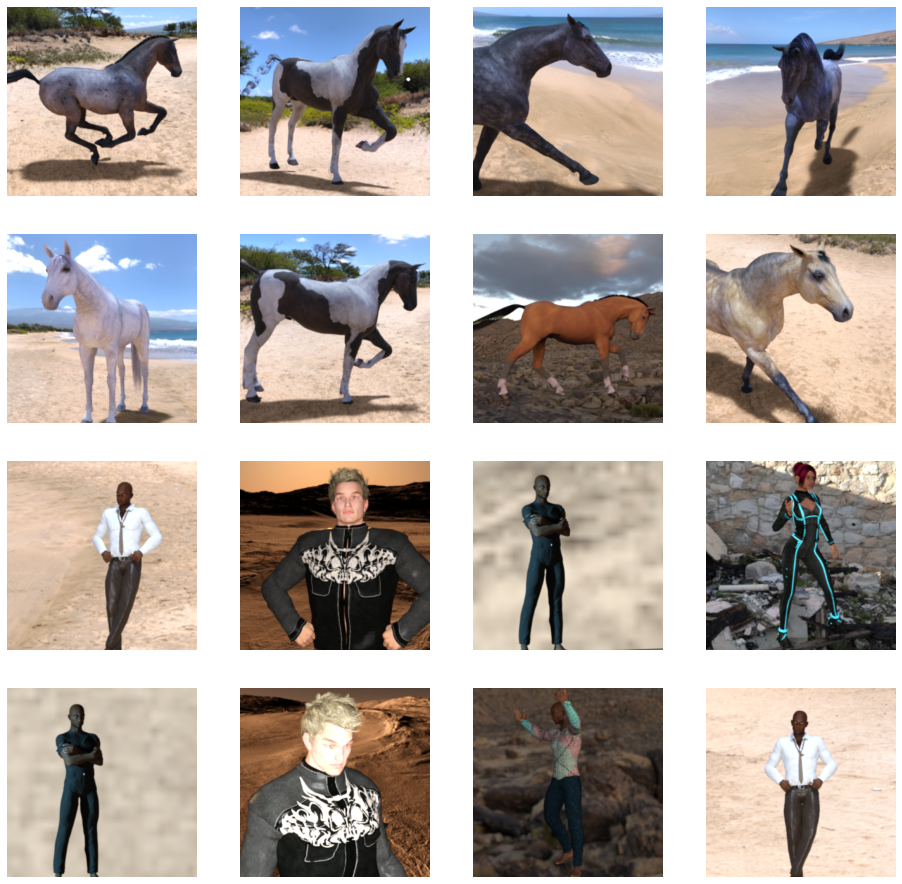

In [13]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_name[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [21]:
history =model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=1)

Epoch 1/15
8/8 [==============================] - 75s 9s/step - loss: 0.8328 - accuracy: 0.5244
Epoch 2/15
8/8 [==============================] - 74s 9s/step - loss: 0.7267 - accuracy: 0.6529
Epoch 3/15
8/8 [==============================] - 63s 8s/step - loss: 0.6407 - accuracy: 0.7330
Epoch 4/15
8/8 [==============================] - 63s 8s/step - loss: 0.9020 - accuracy: 0.8042
Epoch 5/15
8/8 [==============================] - 63s 8s/step - loss: 0.4376 - accuracy: 0.8743
Epoch 6/15
8/8 [==============================] - 63s 8s/step - loss: 0.1470 - accuracy: 0.9299
Epoch 7/15
8/8 [==============================] - 63s 8s/step - loss: 0.1606 - accuracy: 0.9310
Epoch 8/15
8/8 [==============================] - 63s 8s/step - loss: 0.2374 - accuracy: 0.9422
Epoch 9/15
8/8 [==============================] - 65s 8s/step - loss: 0.3274 - accuracy: 0.8265
Epoch 10/15
8/8 [==============================] - 72s 9s/step - loss: 0.3897 - accuracy: 0.8594
Epoch 11/15
8/8 [======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


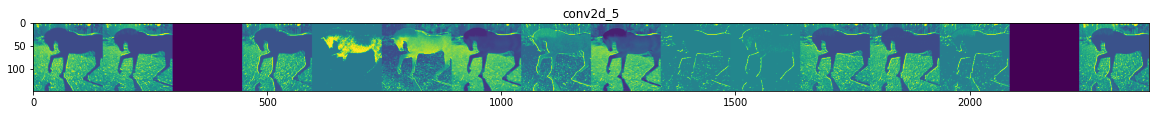

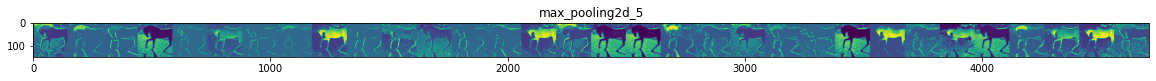

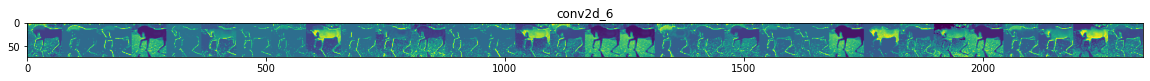

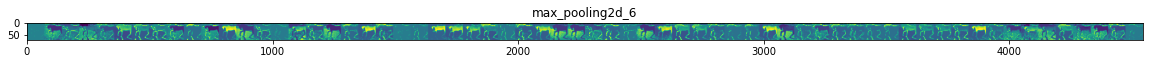

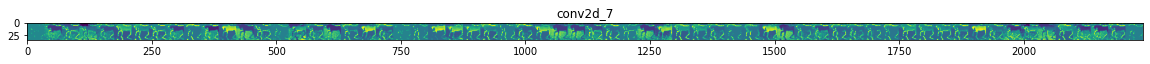

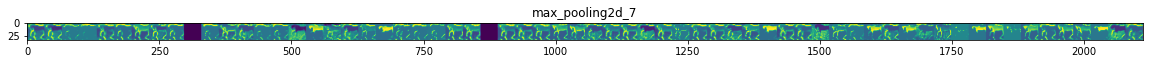

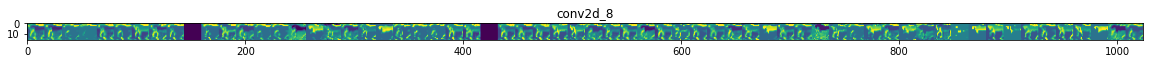

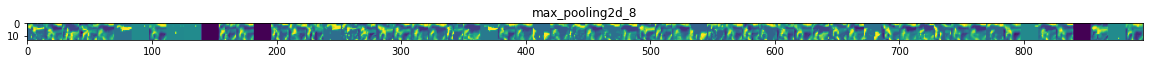

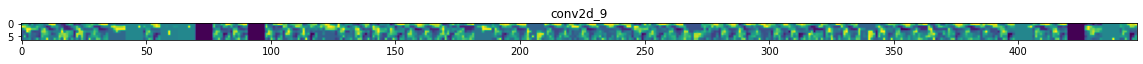

In [23]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_name]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_name]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)